In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler


In [2]:
url = "https://raw.githubusercontent.com/jbrownlee/Datasets/master/monthly-sunspots.csv"
data = pd.read_csv(url)


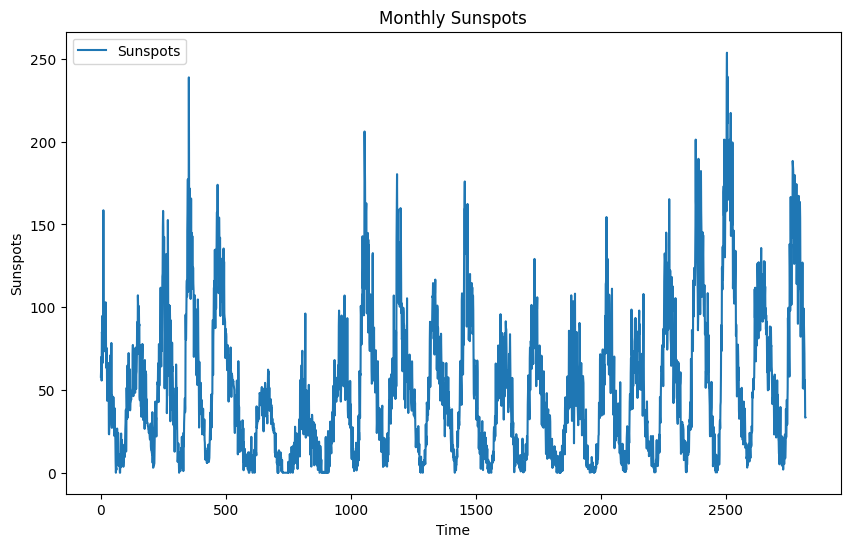

In [3]:
plt.figure(figsize=(10, 6))
plt.plot(data['Sunspots'], label='Sunspots')
plt.title('Monthly Sunspots')
plt.xlabel('Time')
plt.ylabel('Sunspots')
plt.legend()
plt.show()

In [4]:
scaler = MinMaxScaler(feature_range=(0, 1))
data['Sunspots'] = scaler.fit_transform(data[['Sunspots']])

In [5]:
def create_sequences(data, time_steps=12):
    X, y = [], []
    for i in range(len(data) - time_steps):
        X.append(data[i:i + time_steps])
        y.append(data[i + time_steps])
    return np.array(X), np.array(y)

In [6]:
time_steps = 12
X, y = create_sequences(data['Sunspots'].values, time_steps)

In [7]:
X = X.reshape((X.shape[0], X.shape[1], 1))


In [8]:
split = int(len(X) * 0.8)
X_train, X_test = X[:split], X[split:]
y_train, y_test = y[:split], y[split:]

In [9]:
print(f"Train shape: {X_train.shape}, Test shape: {X_test.shape}")

Train shape: (2246, 12, 1), Test shape: (562, 12, 1)


In [10]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import SimpleRNN, Dense

In [11]:
model = Sequential([
    SimpleRNN(50, activation='tanh', input_shape=(time_steps, 1)),
    Dense(1)
])

/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [12]:
model.compile(optimizer='adam', loss='mse', metrics=['mae'])
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ simple_rnn (SimpleRNN)               │ (None, 50)                  │           2,600 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 1)                   │              51 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 2,651 (10.36 KB)

 Trainable params: 2,651 (10.36 KB)

 Non-trainable params: 0 (0.00 B)

In [13]:
history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=20, batch_size=16, verbose=1)

Epoch 1/20
141/141 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - loss: 0.0059 - mae: 0.0549 - val_loss: 0.0059 - val_mae: 0.0567
Epoch 2/20
141/141 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0035 - mae: 0.0427 - val_loss: 0.0059 - val_mae: 0.0566
Epoch 3/20
141/141 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0037 - mae: 0.0430 - val_loss: 0.0057 - val_mae: 0.0552
Epoch 4/20
141/141 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.0037 - mae: 0.0436 - val_loss: 0.0062 - val_mae: 0.0576
Epoch 5/20
141/141 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.0035 - mae: 0.0426 - val_loss: 0.0055 - val_mae: 0.0540
Epoch 6/20
141/141 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.0034 - mae: 0.0412 - val_loss: 0.0055 - val_mae: 0.0550
Epoch 7/20
141/141 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.0036 - mae: 0.0424 - val_loss: 0.0064 - val_mae: 0.0576
Epoch 8/20
141/141 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.0038 - mae: 0.0436 - val_loss: 0.0055 - val_mae: 0.0537
Epoch 9/20
141/141 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - lo

In [14]:
predictions = model.predict(X_test)

18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step


In [15]:
y_test_rescaled = scaler.inverse_transform(y_test.reshape(-1, 1))
predictions_rescaled = scaler.inverse_transform(predictions)


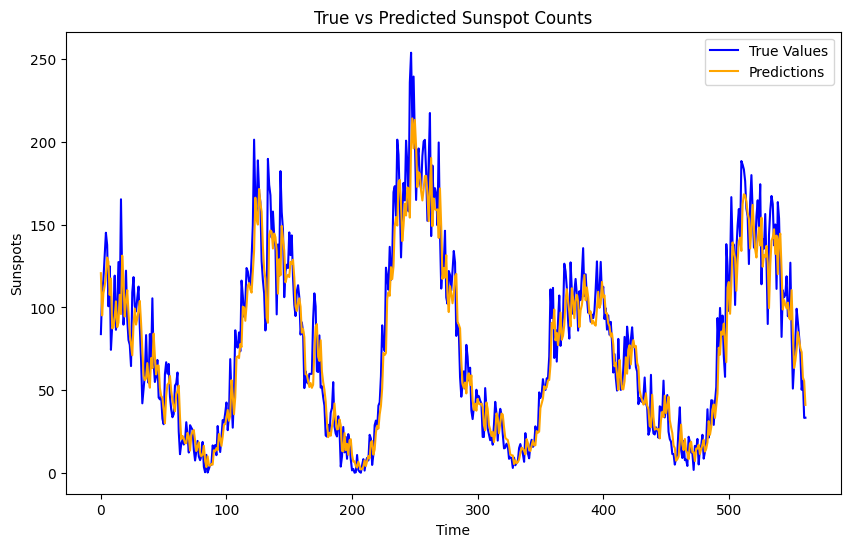

In [16]:
plt.figure(figsize=(10, 6))
plt.plot(y_test_rescaled, label='True Values', color='blue')
plt.plot(predictions_rescaled, label='Predictions', color='orange')
plt.title('True vs Predicted Sunspot Counts')
plt.xlabel('Time')
plt.ylabel('Sunspots')
plt.legend()
plt.show()